In [3]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import sys
sys.path.append('../dac')
from dac import *
import seaborn as sns

from copy import deepcopy
from os.path import join as oj
from tqdm import tqdm
import pickle as pkl

# load data + fit a model

**load data**

In [44]:
df = pd.read_csv("../data/Bike-Sharing-Dataset/hour.csv", sep=',',header=None)
raw_data = np.genfromtxt("../data/Bike-Sharing-Dataset/hour.csv", delimiter=',')
labels = df.values[0, :]
raw_data = raw_data[1:, :]
raw_y = raw_data[:, 16]
raw_data = raw_data[:, 2:14]

feature_names = labels[2:14]
X, X_test, y, y_test = train_test_split(raw_data, raw_y, test_size=.25)

**fit model**

In [41]:
forest = RandomForestRegressor(n_estimators=4)
forest.fit(X, y)
preds = forest.predict(X_test)
rmse = np.sqrt(np.mean((y_test - preds) ** 2))

# look at dac curves

**names of features**

In [45]:
print(feature_names)

['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']


In [35]:
feat_intervals = [(1, 4.5), (0, 1.25), (1, 13), (0, 25), (0, 1.25), (0, 1.5), (0, 1.5), (1, 3.5), (0, 1), (0, 1), (0, 1), (0, 1)]
feat_di = [.5, .25, 1, 1, .25, .5, .5, .5, .1, .1, .1, .1]

# 1D dac curve

In [48]:
feature = 'mnth'
idx = np.argmax(features == feature)

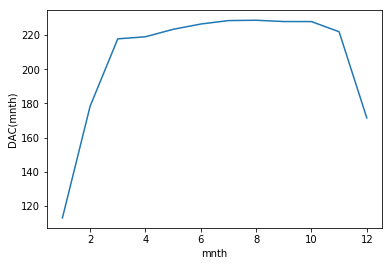

In [47]:
S = np.zeros(len(features))
S[idx] = 1
dac_1D = make_curve_forest(forest, X, y, S, feat_intervals[idx], feat_di[idx], C=1, continuous_y=True)
x_axis = np.arange(feat_intervals[idx][0], feat_intervals[idx][1], feat_di[idx])
plt.plot(x_axis, dac_1D, label=features[idx])
plt.xlabel(feature)
plt.ylabel(f'DAC({feature})')
plt.show()

# 2D dac curve

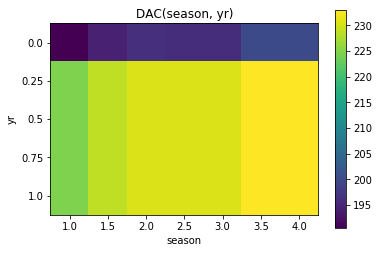

In [63]:
x_ind = 0
y_ind = 1
inds = np.arange(12)

S = np.zeros(12)
S[x_ind] = 1
S[y_ind] = 1
grid = make_map_forest(forest, X, y, S, feat_intervals[x_ind], feat_intervals[y_ind], feat_di[x_ind], feat_di[y_ind], C=3, continuous_y=True)

x_rng = np.arange(feat_intervals[x_ind][0], feat_intervals[x_ind][1], feat_di[x_ind])
y_rng = np.arange(feat_intervals[y_ind][0], feat_intervals[y_ind][1], feat_di[y_ind])


plt.imshow(grid)
plt.xlabel(features[x_ind])
plt.ylabel(features[y_ind])
plt.xticks(range(x_rng.size), labels=x_rng)
plt.yticks(range(y_rng.size), labels=y_rng)
plt.title(f'DAC({features[x_ind]}, {features[y_ind]})')
plt.colorbar()

plt.show()